# 第3回 記述統計学

[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slt666666/biostatistics_text_wed/blob/main/source/_static/colab_notebook/chapter3.ipynb)

## はじめに

"統計学"、"統計的手法"などの言葉を聞くと、何か大量の数値データを計算してどうにかすることを思い浮かべる人は多いのではないでしょうか？

この傾向は、統計学に触れてこなかった人達だけでなく、統計学をある程度学んだ人にも良く見られる傾向です。

しかし、統計学で最も重要なことは、計算をしたり何らかの値を導き出すことではなく、「データが何を語っているのかを捉える」ことになります。

そのための第一歩にして、最も重要なステップが「データを眺める」ことになります。データを正しく効率的に眺める方法を**記述統計学**と呼びます。

記述統計学は、個々の観測結果を集めたデータの特徴を記述するために、得られたデータを整理したり要約する方法を指します。

ある程度統計学を学び色んな手法が使えるようになると、この「データを眺める」というステップをすっ飛ばして、いきなり回帰分析やら検定やらを適用しがちになります。

しかし、それは正しい考え方ではなく、まずデータの全体像を掴むのが最初のステップだということを忘れないようにしてください。

なぜまず最初にデータを眺めることがそれほど重要なのかは、また後程説明していきます。

## 1次元のデータ

通常、観測によって得られる各個体毎のデータは、2種類以上の観測値が得られます。

例えば、ある植物を観測した場合、草丈や葉の長さ、光合成速度や花の色など、様々な観測値が得られます。

まずは、この得られたデータのうち1つに着目し、集団のデータを整理・要約していく方法について説明していきます。

(このような1種類のデータを1次元のデータと呼ぶ。)



### データの種類

データにはいくつかの種類があり、その特性によって扱い方も異なります。

大きなくくりとしてはカテゴリ型(質的)データと数値型(量的)データがあり、その中でも更にいくつか種類があります。

ここではいくつかの代表的なデータの種類を紹介します。

ある植物のサンプルデータを参考に説明していきます。

In [3]:
# サンプルデータの読み込み
df <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter3_data.csv")
df

X,Flower,Resistance,Age,Height,Leaf_length,Leaf_width
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
サンプル1,Yellow,Normal,1,65.78827,7.834566,1.2310844
サンプル2,Purple,Weak,1,26.70546,4.654080,0.6596468
サンプル3,Blue,Very strong,18,31.67394,6.657642,0.5777713
サンプル4,Blue,Very strong,2,41.59529,4.530526,1.0155126
サンプル5,Blue,Very strong,4,40.18388,6.621776,0.5938072
サンプル6,Blue,Very strong,4,28.85123,6.452588,0.3979530
サンプル7,Purple,Weak,19,38.82291,4.279560,0.9062809
サンプル8,Blue,Very strong,23,30.98029,4.659435,0.5892911
サンプル9,Yellow,Normal,16,48.80066,8.535383,0.7677384



1. カテゴリ型データ
  * 名義データ、nominal data
    * 最も単純なデータの一つ。データの属性を表すカテゴリーを示す。
    * 例) 赤色or青色or白色, 男性or女性など。男性を0, 女性を1とおくなど数値に変換することもあるが、**値の間に優劣は無い。**
    * 特に二つの属性(男or女やはいorいいえ)しか存在しない場合、binary data(2値データ)と呼びます。
  * 順序データ、ordinal data
    * カテゴリー間に**順序や優劣関係がある**場合のデータ。
    * 例) 致死・重度・中程度・軽度など。これも4, 3, 2, 1などの数値で表すこともあるが、値自体に意味があるわけではない。
  * 順位データ、ranked data
    * ある規則に基づいて観測データを並び替え、数値を割り当てたもの。
    * 偏差値の高い大学の順位や、食堂での販売順位など。実際の観測値よりも相対的な順位が重視される際に用いられる。
1. 数値型データ
  * 離散データ、discrete data
    * 観測値が**整数**となり、数値の大きさと順位が共に重要な場合に用いられる。
    * 例) 年齢や顧客数、台風の数など。
    * 観測値自体が中間値をとることはないが、平均値を求める等の算術処理が可能であり、その結果台風の数は年平均10.5回来る、等の様に整数とならないこともある。
  * 連続データ、continuous data
    * 多くの測定可能な観測値のデータタイプ。連続した無数の値のうちの一つの値を取ることができる。
    * 例) イネの草丈や収穫量、人の身長など。生物の実験で扱うほとんどの観測値が連続データとなる。
    * 連続データは離散データや順序データ・2値データに変換することも可能だが、情報量が落ちることもあるため、適切な変換を行う必要がある。

### データの要約・視覚的表現

調査や実験を行いデータが得られた際に、データの要約をするために度数分布表を作成することがあります。

1点1点のデータを見るのではなく、全体の分布を捉えることが目的です。

まずは、先ほどのデータセットで`Flower`というカテゴリ型データの列があったかと思います。

このデータを度数分布表にしてみます。`table`関数で行うことが出来ます。

`table(データセットからFlowerの列のデータを取り出す)`

In [4]:
# Flowerの度数をtable関数で表示
table(df$Flower)


  Blue Purple    Red Yellow 
    38     55     59     48 

この様に、各カテゴリ毎のデータ数のことを**度数**と呼びます。

全てのカテゴリの度数をまとめたものを**度数分布**と呼び、これを表にしたものが**度数分布表**です。

今回の結果だと、青色の花が比較的少なく、他の色は同程度の数あることが分かります。

抵抗性の強さ(Resistance)についても度数分布表を作成してみましょう。

`table(Resistanceの列データ)`

In [5]:
# Resistanceの度数分布表を表示
table(df$Resistance)


     Normal Very strong        Weak 
        131          27          42 

では続いて、量的なデータの年齢`Age`の度数分布表を作成してみます。

In [6]:
# Ageの度数分布表を表示
table(df$Age)


 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 
 7  8  9 10  5  7 10  7 12 13  8  5  6  5  7  7  8 11  7 10  6  8  6  8 10 

花の色や抵抗性など、質的なデータはカテゴリ数が少なかったので見やすかったですが、

量的なデータの場合、数が多すぎてあまりよくわかりません。

この様な場合はヒストグラムとして表示する場合が多いです。

Rでは`hist`関数でヒストグラムを描くことが出来ます。

`hist(Ageの列のデータ)`

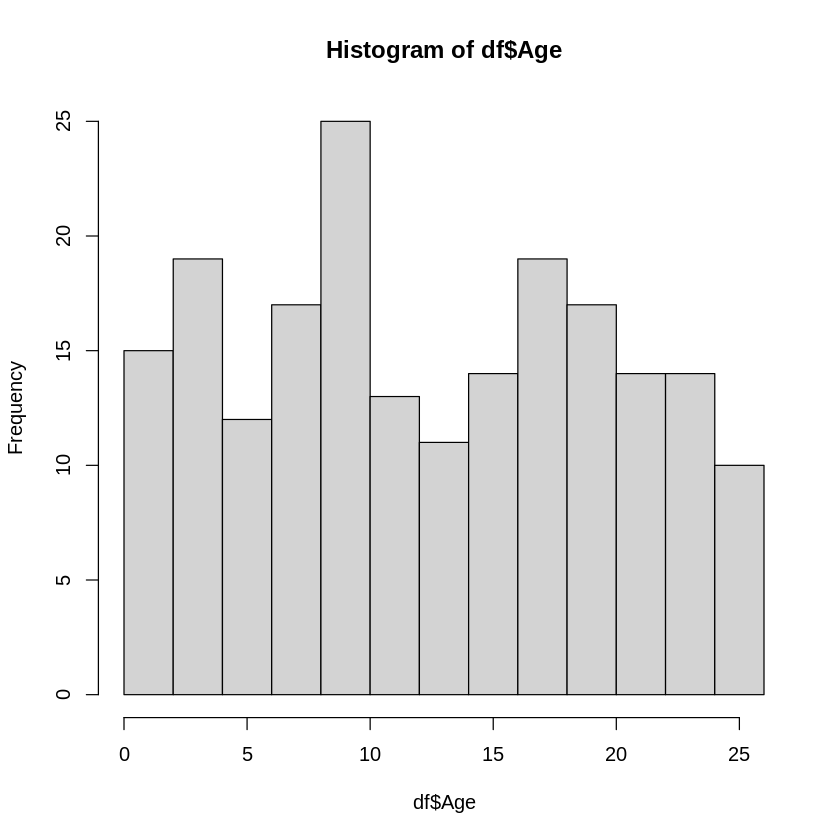

In [7]:
# Ageのヒストグラムをhist関数で描写
hist(df$Age)

ヒストグラムは、取りうる値をいくつかの**階級**に分割し、各階級ごとに**度数**を数えて図にしたものになります。

この様に、量的なデータの場合は、階級毎に度数分布表やグラフを作成します。

また、細かくは説明しませんが、Rの`hist`関数を使用することで、各階級毎の度数を求め表にすることも出来ます。

class,frequency
<chr>,<int>
0 ～ 2,15
2 ～ 4,19
4 ～ 6,12
6 ～ 8,17
8 ～ 10,25
10 ～ 12,13
12 ～ 14,11
14 ～ 16,14
16 ～ 18,19


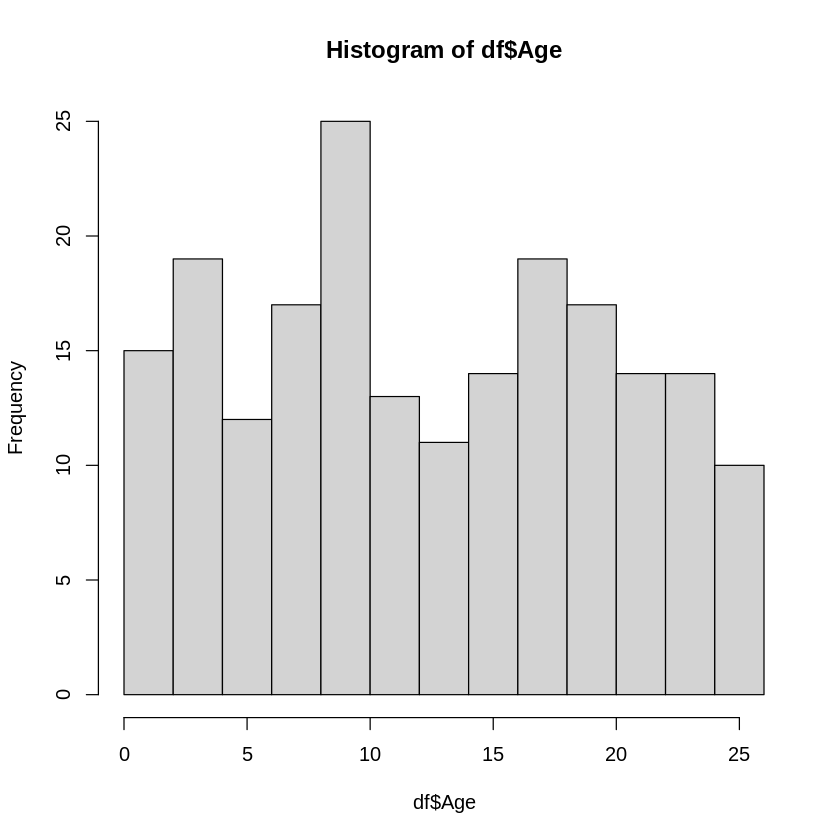

In [8]:
# 描いたヒストグラムの各範囲の度数を表示
h <- hist(df$Age)
n <- length(h$counts) # 階級の数
class_names <- NULL # 階級の名前格納用
for(i in 1:n) {
  class_names[i] <- paste(h$breaks[i], "～", h$breaks[i+1])
}
frequency_table <- data.frame(class=class_names, frequency=h$counts)
frequency_table

同じように量的データである草丈(Height)についてもヒストグラムを作成してみましょう。

`hist(Heightの列データ)`

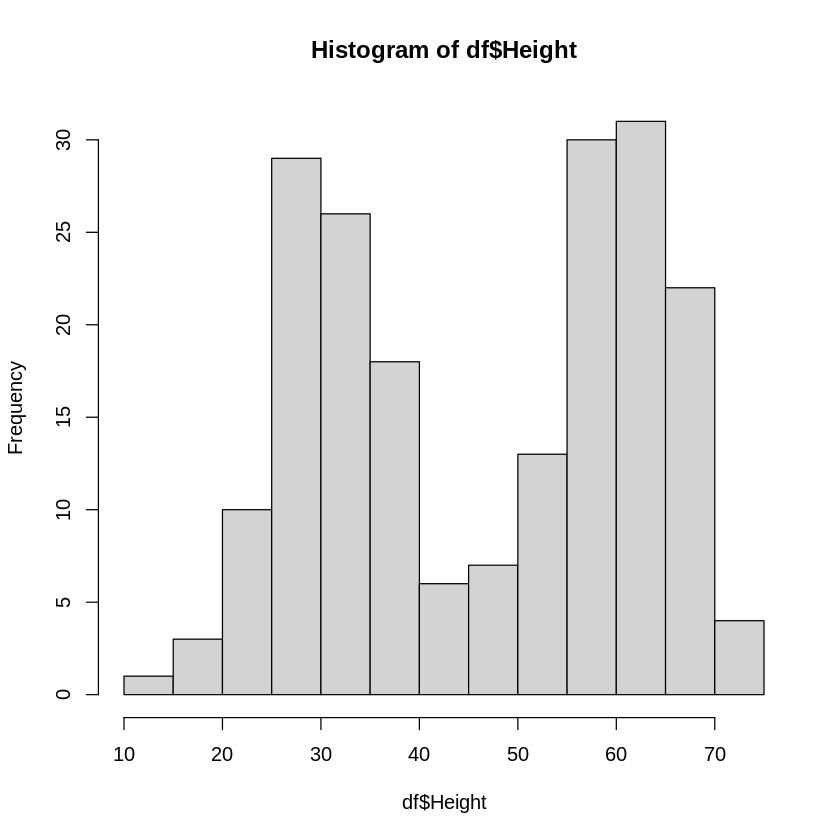

In [9]:
# Heightのヒストグラムを描写
hist(df$Height)

今回の場合は峰が２つありそうです。

この様な場合、性質の異なるデータが混ざっている可能性が高いと考えられます。

例:男女が混ざった身長のデータ

混ざったデータを適切にグループ分けすることを**層別**と呼んだりします。

例えば、今回の草丈のデータは花の色(青・紫 or 赤・黄色)で**層別化**すると峰１つのヒストグラムになります。

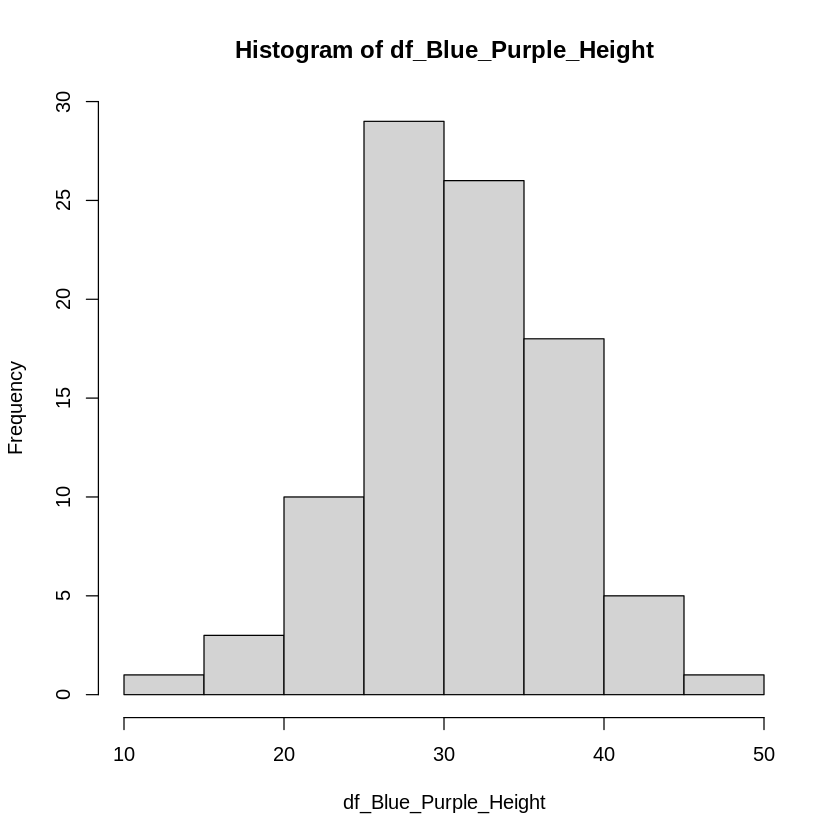

In [10]:
# 花の色(Flower)が青(Blue)か紫(Purple)のデータ
df_Blue_Purple_Height <- df[(df$Flower == "Blue") | (df$Flower == "Purple"), "Height"]
hist(df_Blue_Purple_Height)

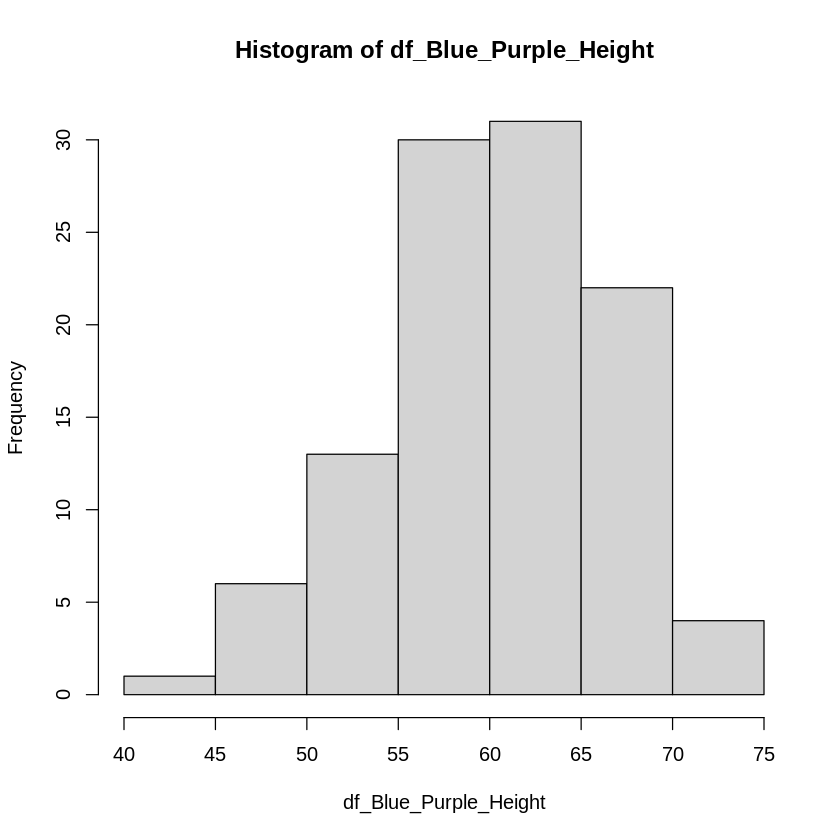

In [11]:
# 花の色(Flower)が赤(Red)か黄色(Yellow)のデータ
df_Blue_Purple_Height <- df[(df$Flower == "Red") | (df$Flower == "Yellow"), "Height"]
hist(df_Blue_Purple_Height)

※今回の様に花の色によって上手く層別化できると分かっていれば話は簡単ですが、

　実際に解析では何の要因によって層別化出来そうか色々試して探索する必要があります。

また、ヒストグラムを描く際の注意点として、階級の数と階級の幅には気を付ける必要があります。

先ほどのデータを少ない階級の数でヒストグラムを描いてみましょう。

`hist`関数では`breaks`オプションで階級の数を変更することが出来ます。

`hist(data, breaks = ?)`


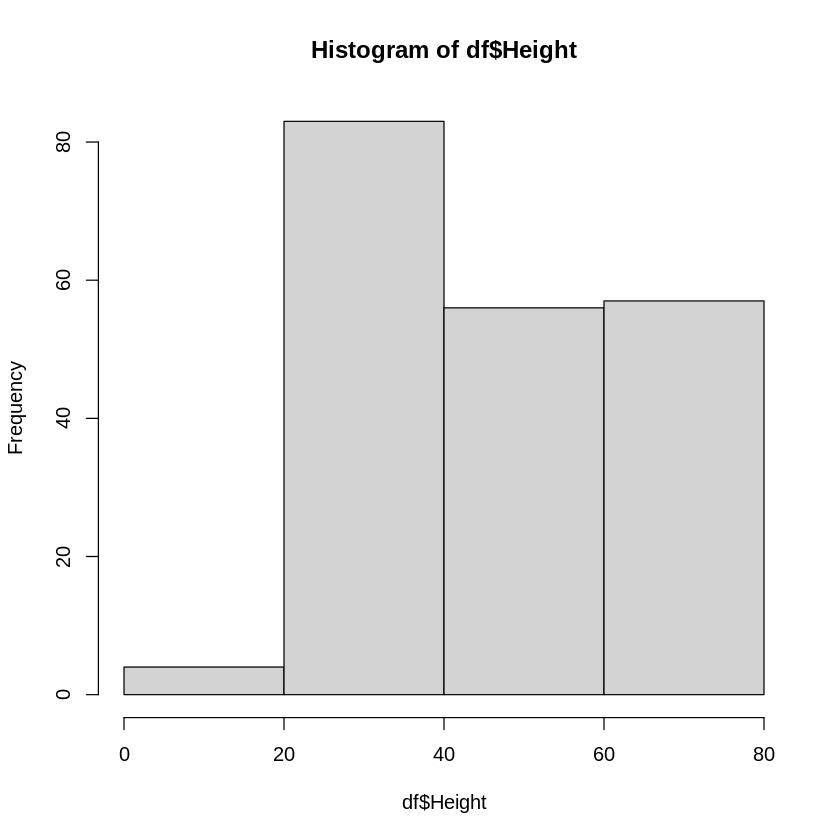

In [12]:
hist(df$Height, breaks=4)

この様に、あまり階級の幅が広すぎると、見えていたはずの2つの峰が見えなくなってしまいます。

階級の数をどのようにとるかはデータ毎に異なってくるので、試行錯誤を繰り返して、データの特徴を上手く表現できる階級数・幅を探す必要があります。

### データの代表値

代表値とは、データの分布を代表する値のことを指します。

先ほどまで扱っていたヒストグラムや度数分布は視覚的な感覚(=個人的な感覚)でデータを把握することになりますが、代表値は数量の概念として捉えることが可能です。

代表値はデータの情報量を減らす場合もありますが、計算したり他者に伝達する際に客観的な値として使用することが可能になります。

平均値や中央値、最頻値といった値が代表値に当たります。



#### ■ 平均値 (mean)

もっともよく使用される代表値が平均値です。特に**算術平均**はよく用いられます。

算術平均$\bar{x}$は観測値 $x_1, x_2, x_3, \cdots, x_n$の和を観測値の総数$n$でわったものになります。

$\bar{x} = \dfrac{x_1+x_2+x_3+\cdots+x_n}{n}$

Rでは`mean`関数で簡単に算術平均を求めることが出来ます。

例えば先ほどのサンプルデータ`df`の草丈`Height`の平均値を求めると

`mean(Heightの列データ)`

In [13]:
# Height列の平均値を求める
mean(df$Height)

[1] 46.42608

##### 他の平均

平均には算術平均以外にも、**幾何平均** (geometric mean)や**調和平均** (harmonic mean)などがあります。

**幾何平均**$x_G$は$x_G = \sqrt[n]{x_1x_2x_3\cdots x_n}$ で定義される平均値になり、

成長率や比率などの平均を扱う際に用いられます。

例えば、植物の草丈が5日間の間にそれぞれ15%, 24%, 32%, 20%, 28%成長した場合、日毎の平均成長率は



In [14]:
# 算術平均の場合
up_rate <- c(15,24,32,20,28)
mean(up_rate)

[1] 23.8

で23.8%ではなく、幾何平均を用いる必要があります。

$x_G = \sqrt[5]{1.15\times1.24\times1.32\times1.20\times1.28} = \sqrt[5]{2.89124352} = 1.23656495589664$

ということで、23.66%が平均成長率となる。

これは"毎日同じ成長率が適用された場合"という意味で、平均的な成長率と解釈します。

In [15]:
# 幾何平均の計算
(1.15*1.24*1.32*1.20*1.28)**(1/5)

[1] 1.236565

幾何平均は対数をとるとRでより簡単に計算できます。

$x_G = \sqrt[5]{1.15\times1.24\times1.32\times1.20\times1.28}$

$\log x_G = \dfrac{1}{5}(\log 1.15+\log 1.24 + ... + \log 1.28)$

$x_G = e^{\frac{1}{5}(\log 1.15+\log 1.24 + ... + \log 1.28)}$

In [16]:
# 対数を用いて幾何平均を求める
up_rate <- c(1.15, 1.24, 1.32, 1.20, 1.28)
exp(mean(log(up_rate)))

[1] 1.236565

調和平均$x_H$は逆数同士の算術平均

$\dfrac{1}{x_H} = \dfrac{1}{n}(\dfrac{1}{x_1}+\cdots+\dfrac{1}{x_n})$

を求め、そのまた逆数を求めた値になります。

割合や速度などの平均を求める際に使用します。

簡単な例だと行き時速40km、帰り時速20kmで移動した場合の平均速度は$(40+20)/2=30$だと正しくないので、調和平均で求める事が出来ます。

In [17]:
# 時速40kmと時速20kmの調和平均を求める
1/((1/2)*(1/40+1/20))

[1] 26.66667

#### 平均値を利用する際の注意点

最初にも記述しましたが、代表値はデータの情報量を減らす可能性があります。

例えば下はサンプルデータ`df`の草丈`Height`の平均値を求めてみると…

In [18]:
# 草丈(Height)の平均値
mean(df$Height)

[1] 46.42608

と一応平均値は求まります。

ここで下はサンプルデータ`df`の草丈`Height`のヒストグラムと平均値を描くコードになりますが、

この様な分布の場合安易に平均値を代表値としてしまって良いでしょうか？

[1] 46.42608

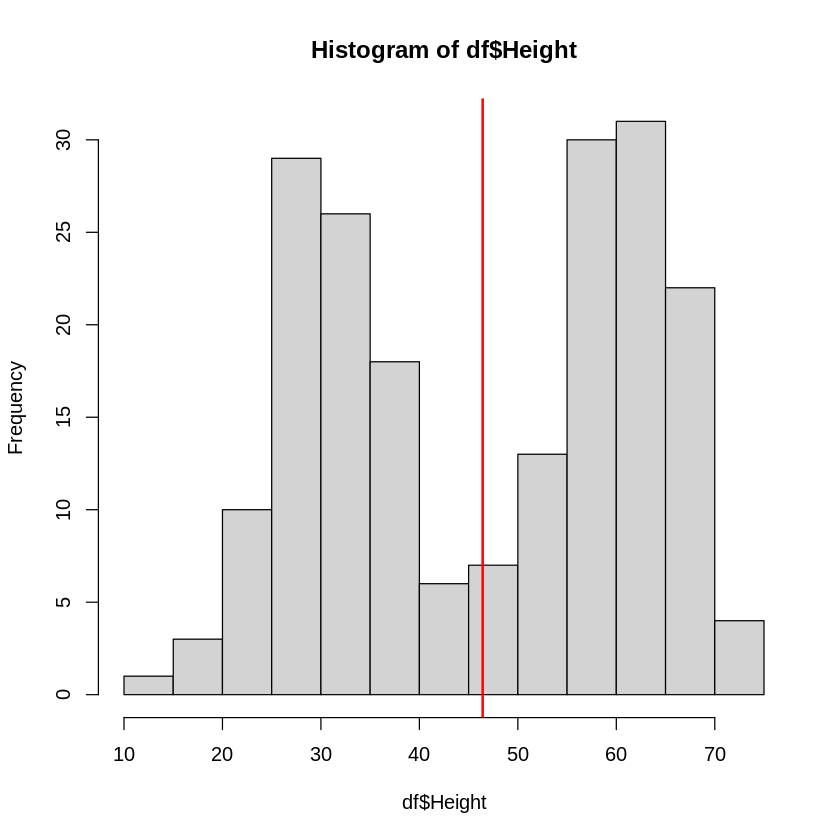

In [19]:
# 草丈(Height)の分布と平均値を図示
hist(df$Height)
abline(v = mean(df$Height),col="red",lty=1,lwd=2) # 平均値に赤線を引く
mean(df$Height)

この場合、平均値は46.4と計算されはしましたが、その値付近にデータは存在していません。

この値を代表値として扱うことが正しいかは疑問符が付きます。

また下記の新たなデータは、とある高校を卒業した学生の年収のサンプルデータになります。

In [20]:
# 新しいサンプルデータ
sample_data <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter3_Hanamaki_higashi.csv")
sample_data

X,Salary
<chr>,<dbl>
student1,138.3699
student2,225.1977
student3,327.0206
student4,307.1165
student5,363.0438
student6,103.8047
student7,412.3765
student8,210.8079
student9,291.5057


このデータ(`sample_data`)の年収(`Salary`)のヒストグラムを描いてみると…

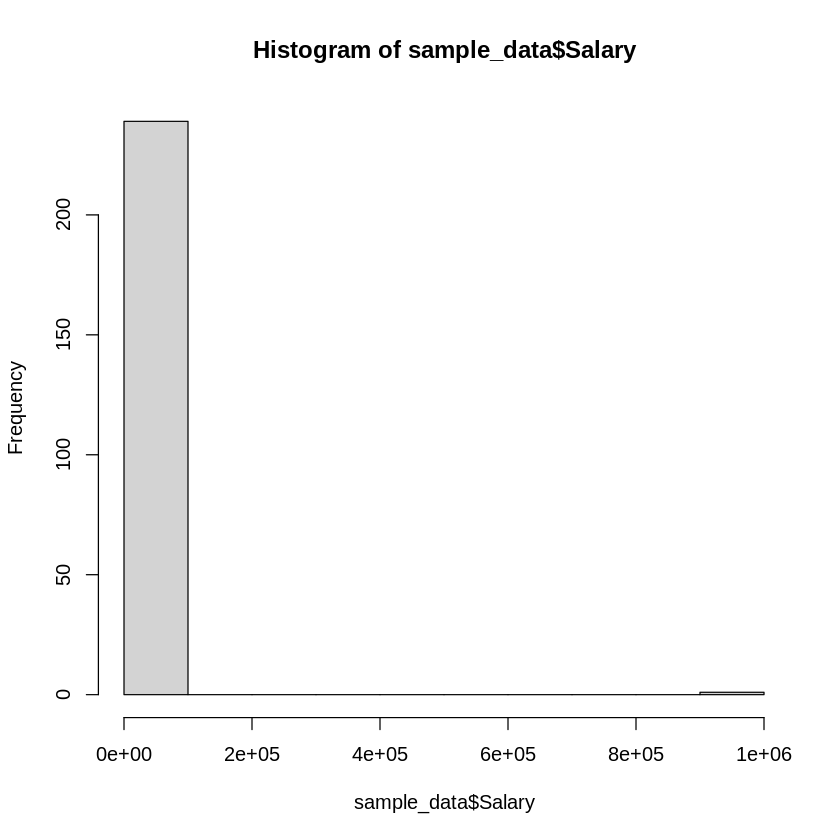

In [21]:
# sample_dataの年収(Salary)のヒストグラムを描く
hist(sample_data$Salary)

極端に高い年収の人が混ざっています。

この様に極端に大きな値や小さな値の様な異常な値(**外れ値**)がデータに含まれている場合は、外れ値を省いて平均値を計算する方が望ましい場合もあります。

ただし、外れ値だと思っていた値が、実際に生じ得る観察結果である可能性も当然ありえるため、データを省く際には、種のレベルで個体差があった、ヒューマンエラー(肥料の量ミス、水やりを忘れていた等)があった等、極端な値が外れ値である可能性が高いという根拠があるほうが好ましいです。

#### ■ 中央値 (median)

先ほど説明した、外れ値が混ざっていた場合や、データの分布が偏っている場合には、平均値が代表値として適切ではないことがあります。

この様な場合、ある観測地より小さい観測値の数と大きな観測値の数が等しくなる様な値の方が望ましいことがあります。このような値は**中央値**(median)と呼ばれます。

有名な例として、「2013年に花巻東高校を卒業した生徒の平均年収が4000万円になる」というものがあります。

花巻東高校は各学年が240人いるそうなので、某野球選手が100億円くらい貰っていたら計算が合います。

(実際の年俸等は詳しくないので自分で調べてください。)

* https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter3_Hanamaki_higashi.csv

上記URLに仮想の卒業生の年収データを入れてあるので、読み込んで平均値を求めてみましょう。

```
Hanamaki_df <- read.csv(ファイル名のURL)
mean(平均値を求めるデータ)
```

[1] 4458.586

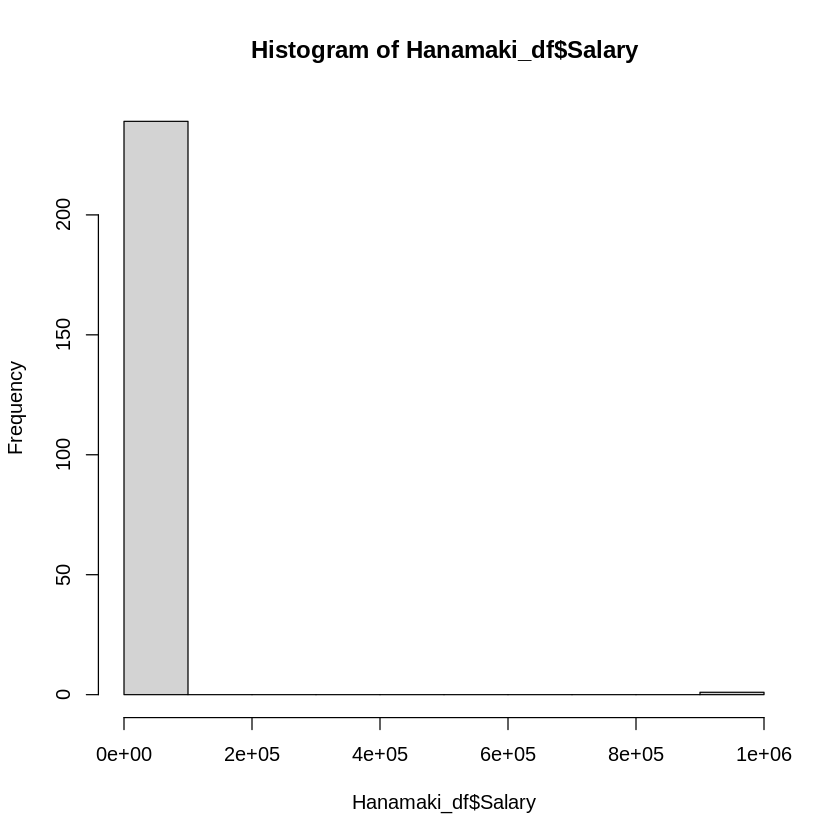

In [22]:
# 花巻東高校の仮想年収データの平均値
Hanamaki_df <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter3_Hanamaki_higashi.csv")
mean(Hanamaki_df$Salary)
hist(Hanamaki_df$Salary)

また、外れ値を省いた(`Salalry`が1000000未満)データから平均値・ヒストグラムを描いてみると

[1] 293.1403

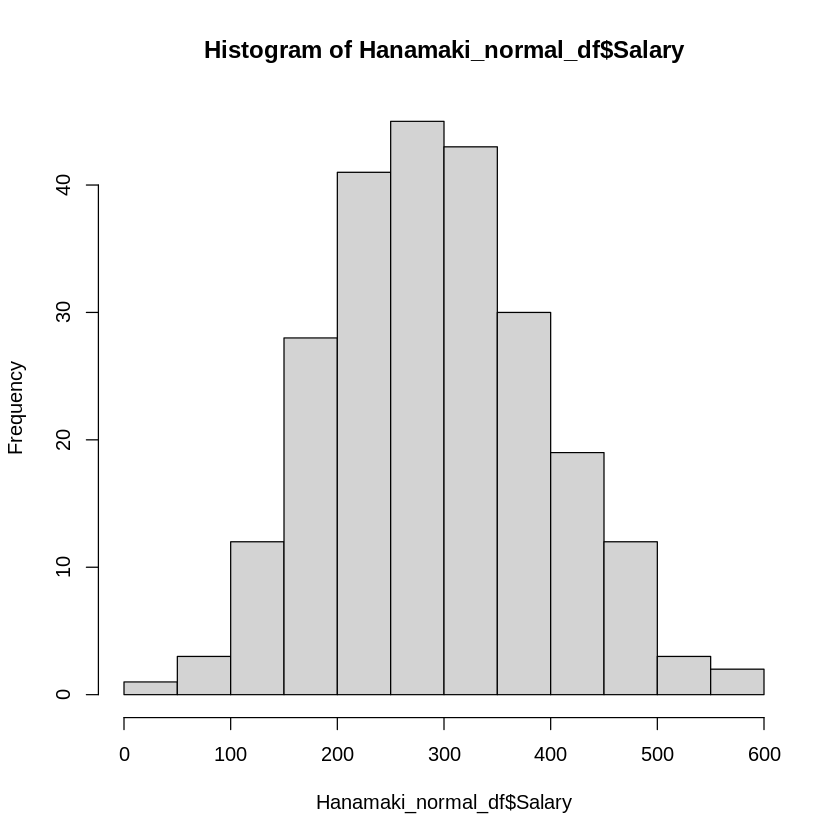

In [23]:
# 外れ値を省いた結果
Hanamaki_normal_df <- Hanamaki_df[Hanamaki_df$Salary < 1000000,]
mean(Hanamaki_normal_df$Salary)
hist(Hanamaki_normal_df$Salary)

ある程度ばらつきが見えてきます。

この様な、極端なデータの分布をしている場合は、平均値がデータの代表値としては不適切だと考えられるため、**中央値**を使用します。

極端に大きい(小さい)観測値の影響を省いた、中心的な値の情報が手に入ります。

Rでは`median`関数で求めることが出来ます。

`median(中央値を求めるデータ)`

In [24]:
# Salary列データの中央値を求める
median(Hanamaki_df$Salary)

[1] 291.7991

この中央値の考え方を拡張したものに**分位点**があります。

観測値を小さいものから並べたとき、全体の$100p\%(0\leqq p\leqq1)$に位置する値を$100p\%$**パーセンタイル**または**百分位点**と呼びます。

特によく用いられるのは四分位点(quartile)で、25％ずつデータを分割した際の3つの分割点になります。

**第1四分位点**$Q_1$は25％分位点、**第2四分位点**$Q_2$は50％分位点(**中央値**)、**第3四分位点**$Q_3$は75％分位点になります。

箱ひげ図(boxplot)を描く際には、この四分位点を基準にBoxが描かれることが多いです。

Rでは`boxplot`関数で簡単な箱ひげ図を描くことが出来ます。

また、前回扱った`summary`関数でも四分位点を表示してくれます。

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   25.75   50.50   50.50   75.25  100.00 

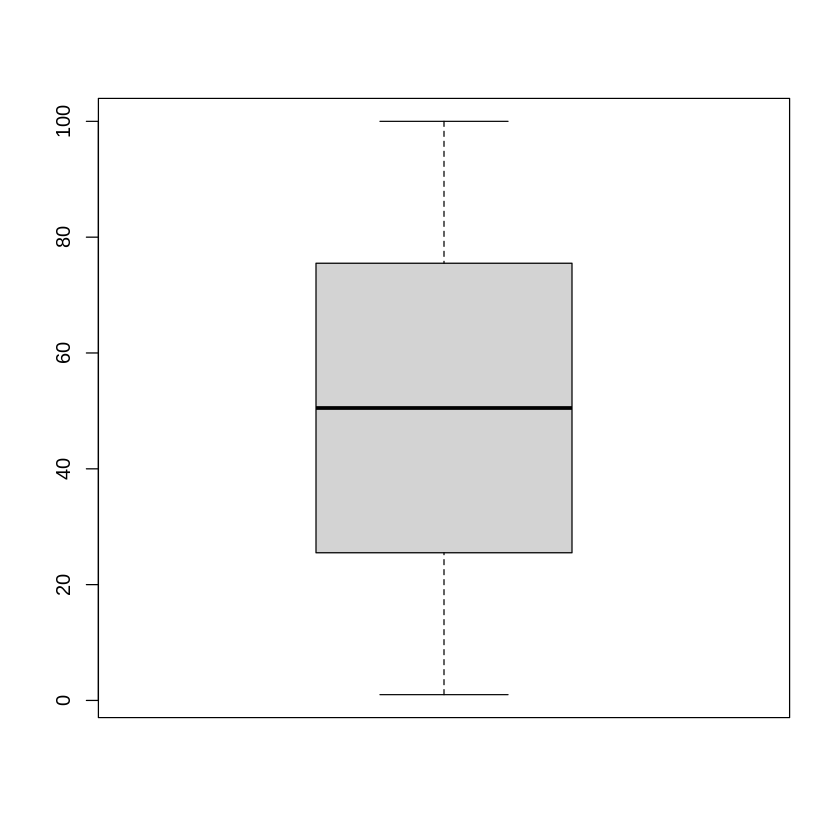

In [25]:
# 1,2,3,...,99,100のデータに対し、summary関数の適用と箱ひげ図を描く
sample_data <- seq(1,100) # 1~100までの数値
summary(sample_data)
boxplot(sample_data)

#### ■ 最頻値 (mode)
平均値、中央値と並んでよく用いられる代表値の一つに最頻値があります。

ヒストグラムを描いた際に、分布の峰となっている部分の値になります。

例えば最初のサンプルデータの年齢(Age)列のデータの場合、ヒストグラムと各範囲の度数分布表を描いてみると

class,frequency
<chr>,<int>
0 ～ 2,15
2 ～ 4,19
4 ～ 6,12
6 ～ 8,17
8 ～ 10,25
10 ～ 12,13
12 ～ 14,11
14 ～ 16,14
16 ～ 18,19


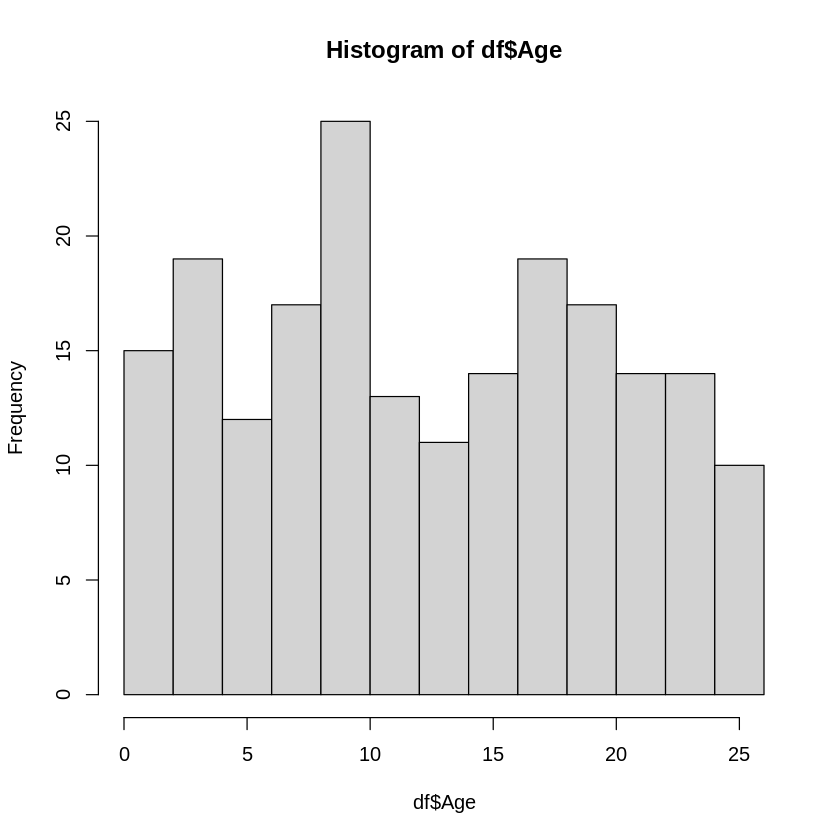

In [26]:
# ヒストグラムと度数分布表を描く
h <- hist(df$Age)
n <- length(h$counts) # 階級の数
class_names <- NULL # 階級の名前格納用
for(i in 1:n) {
  class_names[i] <- paste(h$breaks[i], "～", h$breaks[i+1])
}
frequency_table <- data.frame(class=class_names, frequency=h$counts)
frequency_table

この場合は8~10が最頻値となります。

当然ながら、最頻値は階級の取り方によって変化します。

もっとたくさんの階級でヒストグラムを描いてみると、

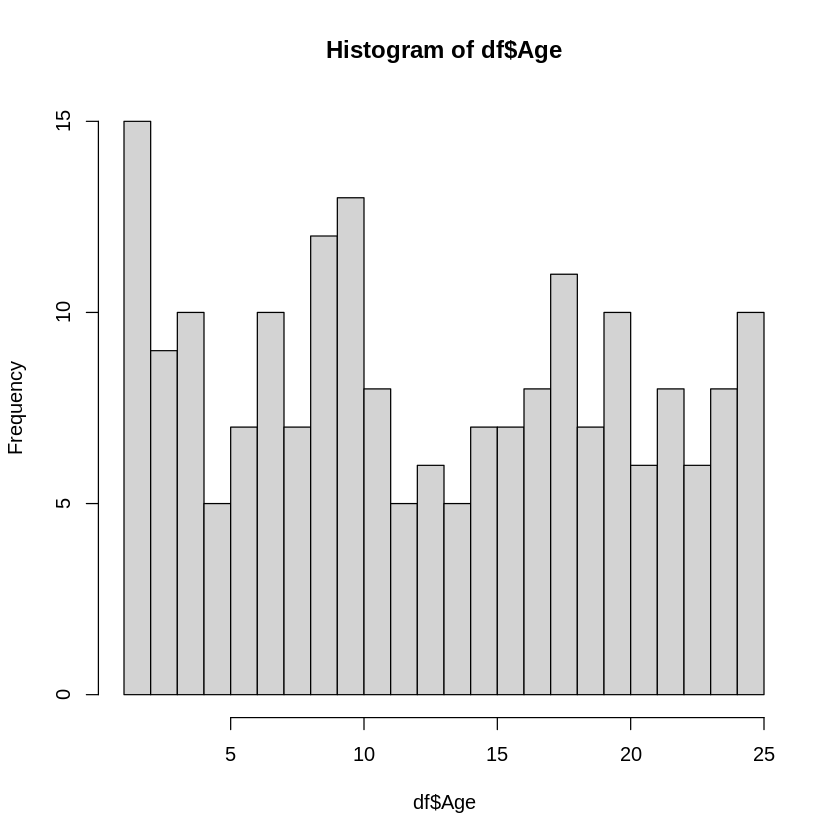

In [27]:
# breaksの数値を増やしてより細かい階級でのヒストグラムを描く
hist(df$Age, breaks=20)

例えば`breaks=20`にした場合は、1~2が最頻値となります。

実際の解析では、この様に最頻値になりうる値が複数ある(峰がいくつかありそうな)分布では最頻値は有効な値とは言えません。

階級の取り方を変えてもそれほど大きく最頻値の位置が変わらない様な分布を示す場合に、有効な代表値となります。

### 散らばりの尺度

代表値はあくまでも分布の中心的な位置を示す値であり、それだけでデータを説明出来る訳ではありません。

例えば下記のA, B, Cそれぞれのデータについて、`mean`関数で平均値を、`median`関数で中央値を求めてみましょう。


In [28]:
# 各データの平均値と中央値を求める
A <- c(0,0,30,30,60,78,78,140,142,150,150)
B <- c(10,30,50,60,70,78,80,100,120,120,140)
C <- c(60,70,70,70,70,78,80,80,90,90,100)

mean(A)
mean(B)
mean(C)
median(A)
median(B)
median(C)

[1] 78

[1] 78

[1] 78

[1] 78

[1] 78

[1] 78

A,B,Cのデータセットはいずれも平均値、中央値が78のデータセットになっています。

しかし、`hist`関数で分布をみると大きく異なっています。

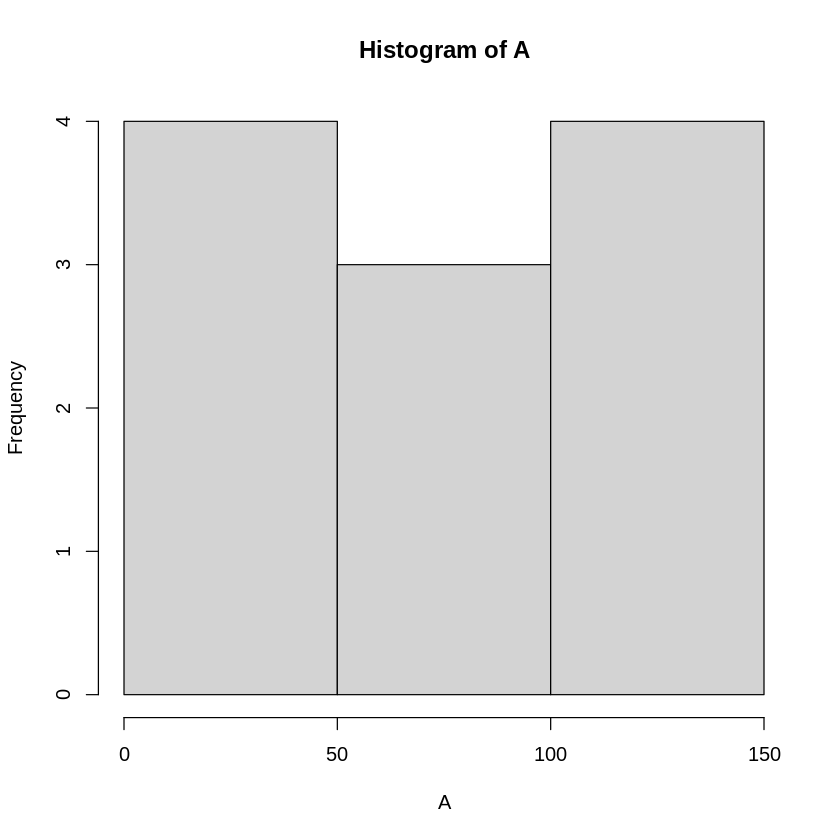

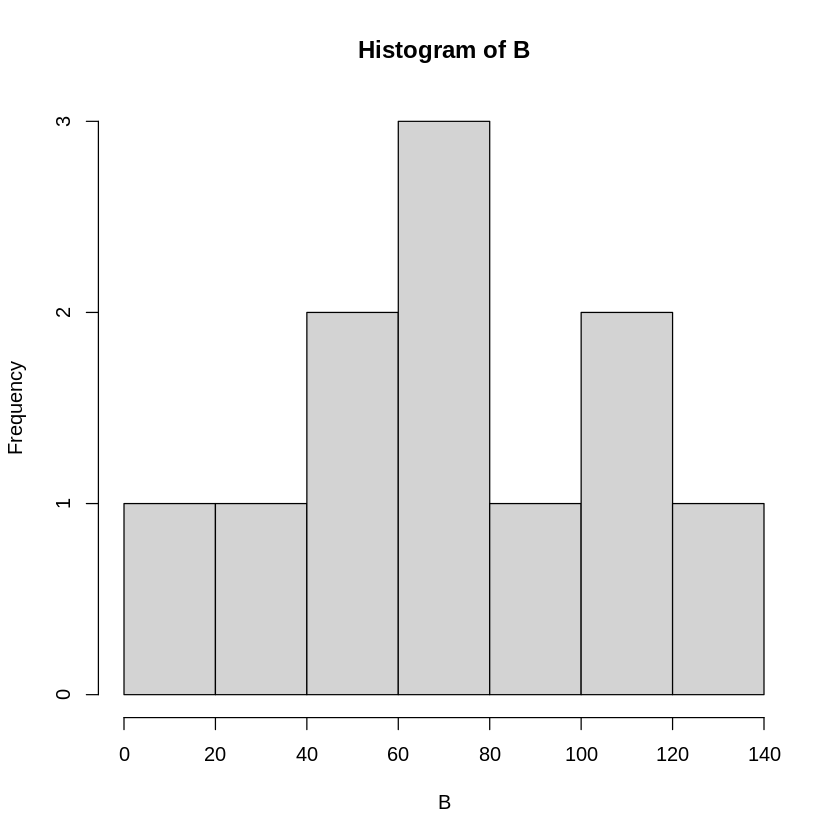

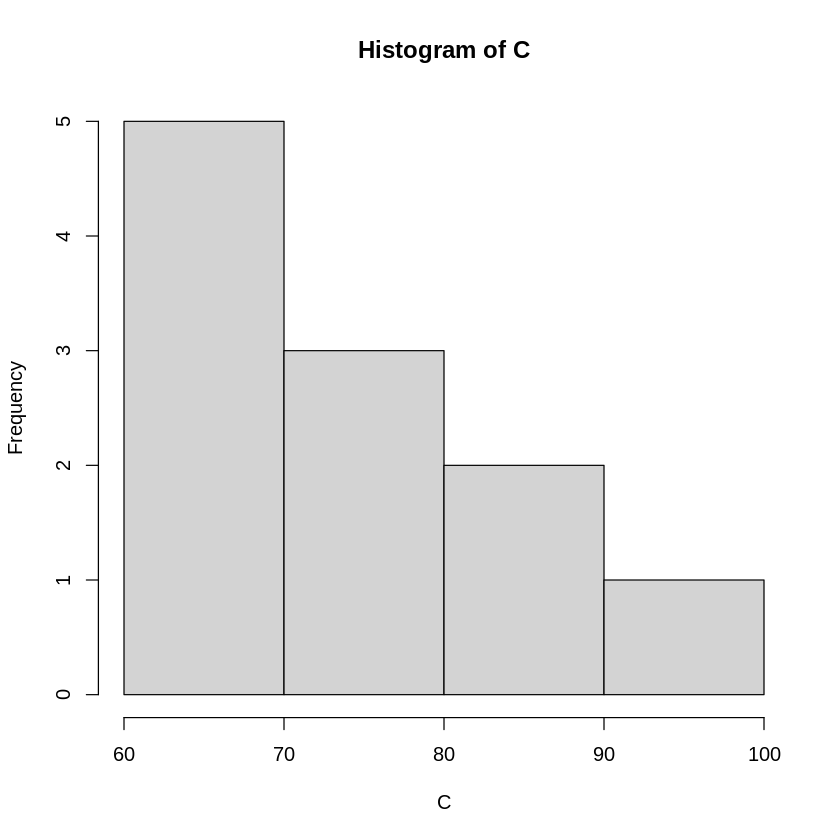

In [29]:
hist(A)
hist(B)
hist(C)

ということで、A,B,Cのデータの分布の違いを説明する値が必要になります。

この様な場合、データの分布の形状を示す指標として、代表値だけではなく散らばり具合を示す尺度が用いられます。

#### ■ レンジ

散らばり具合を表すもっとも簡単な指標がレンジになり、分布の存在する範囲を示します。

レンジ$R$は、$R=max(x_1,x_2,\cdots,x_n) - min(x_1,x_2,\cdots,x_n)$で定義されます。

Rでは`range`関数で最小値と最大値を表示できるのでその差をとればレンジ$R$が計算できます。


In [30]:
# 各データのrangeを求める
range(A)
range(B)
range(C)

[1]   0 150

[1]  10 140

[1]  60 100

レンジは簡単に計算できますが、最大値・最小値という２つのデータポイントのみに依存するので、

散らばり具合を説明するには粗く、あまり用いられません。

(先ほどの花巻東高校の例だとレンジがかなり広くなることになります。)

そこで、最小値・最大値のデータだけでなく、すべてのデータを用いて散らばり具合を表す尺度が次に説明する**偏差**になります。

#### ■ 偏差

**偏差**(deviation)は、すべてのデータを用いて計算する散らばり具合を表す尺度で、各観測値と平均との隔たりをもとに計算します。

偏差には標準偏差や平均偏差がありますが、理論的な性質等が理由で通常は標準偏差が使用されます。

#### (参考)平均偏差

各観測値$x_i$が平均$\bar{x}$からどれだけ離れているかの平均を求めたものが**平均偏差**(mean deviation)になります。

平均偏差$d$は、$d=\dfrac{1}{n}\lbrace|x_1 - \bar{x}|+|x_2 - \bar{x}|+\cdots+|x_n - \bar{x}|\rbrace$ で求められます。




#### ■ 分散と標準偏差

観測値を平均の差を、2乗することで符号を消し、平均を求めたものを**分散**(variance)と呼びます。

分散は$S^2$という記号で表され、

$S^2=\dfrac{1}{n}\lbrace(x_1 - \bar{x})^2+(x_2 - \bar{x})^2+\cdots+(x_n - \bar{x})^2\rbrace$

と定義されます。

観測値が$cm$だった場合、分散はこのままでは測定単位が変わってしまう($cm^2$)ので、

観測値と単位を揃える際には、分散の平方根をとった$\sqrt{S^2}=S$が用いられます。

この$S$を**標準偏差**(standard deviation)と呼びます。

先ほどのAのデータセットを用いて分散を計算してみましょう

In [31]:
A <- c(0,0,30,30,60,78,78,140,142,150,150)

まずは平均値$\bar{x} = \dfrac{1}{n}(x_1+...+x_n)$を計算します。`mean`関数で計算可能です。

In [32]:
# 平均値を求める
mean_A <- mean(A)
mean_A

[1] 78

次にAの各値$x_1, ..., x_n$から平均値$\bar{x}$を引き、平均からの**偏差**を求めます。

$(x_1 - \bar{x})+(x_2 - \bar{x})+\cdots+(x_n - \bar{x})$

In [33]:
# 平均値からの差である偏差を求める
A_deviation <- A - mean_A
A_deviation

[1] -78 -78 -48 -48 -18   0   0  62  64  72  72

これで各データが平均からどれだけ離れているかが計算できた訳ですが、正負が混ざっているのでそのまま平均を計算してしまうと、散らばり具合が0になってしまいます。

そこで、各偏差を2乗して符号を消します。

$(x_1 - \bar{x})^2+(x_2 - \bar{x})^2+\cdots+(x_n - \bar{x})^2$

Rでは累乗の計算は`^`で行うことが出来ます。

例)2の10乗は`2^10`。`^`をベクトルに適用すると、各要素が累乗されます。

In [34]:
# 偏差を二乗する
A_deviation^2

[1] 6084 6084 2304 2304  324    0    0 3844 4096 5184 5184

この値の平均値が**分散**になります。

$S^2 = \dfrac{1}{n}\lbrace(x_1 - \bar{x})^2+(x_2 - \bar{x})^2+\cdots+(x_n - \bar{x})^2\rbrace$

In [35]:
# 偏差の二乗の平均値を求める
sum_squared_deviation <- sum(A_deviation^2)
variance <- sum_squared_deviation / length(A) # length関数でデータの数をカウント出来る
variance

[1] 3218.909

次にこの分散の値の平方根をとったものが**標準偏差**です。

$\sqrt{S^2} = S$

Rでは平方根は`sqrt`関数で計算できます。

In [36]:
# 分散の平方根を求める
sqrt(variance)

[1] 56.73543

こうして分散が3218.9090..., 標準偏差が56.7354....と求まりましや。

今回はちゃんと計算しましたが、Rには分散や標準偏差を求める関数があります。

分散は`var`、標準偏差は`sd`という関数で求めることが出来ます。

In [37]:
# 分散
var(A)
# 標準偏差
sd(A)

[1] 3540.8

[1] 59.50462

Rの関数で計算した分散や標準偏差は、今回計算で求めた値と一致しません。

これはRの関数で計算される値は**不偏分散**と呼ばれるものでで、私達の計算してきた値は**不偏でない分散**と呼ばれる値になるからです。




##### **不偏でない分散と不偏分散**

分散には**不偏でない分散**$S^2$と**不偏分散**$s^2$と呼ばれるものがあります。

不偏でない分散は先ほど説明した$S^2$で、

$S^2=\dfrac{1}{n}\lbrace(x_1 - \bar{x})^2+(x_2 - \bar{x})^2+\cdots+(x_n - \bar{x})^2\rbrace$

一方、不偏分散$s^2$は、

$s^2=\dfrac{1}{n-1}\lbrace(x_1 - \bar{x})^2+(x_2 - \bar{x})^2+\cdots+(x_n - \bar{x})^2\rbrace$

で表されます。

違いは平均値を求める際に$n$で割っているか$n-1$で割っているかになります。

実際に先ほど求めた偏差の2乗和を$n-1$でを割ってみると`var`関数と同じ結果になります。

In [38]:
# 不偏分散を求める
sum_squared_deviation / (11 - 1)
var(A)

[1] 3540.8

[1] 3540.8

不偏でない分散は得られた観測データ自体の分散を表しており、不偏分散は得られた観測データから推測される母集団の分散を表します。

標本数が少ないときに、標本分散は母集団の分散よりも小さくなる傾向にあるため、補正したものが不偏分散です。

逆に標本数が多くなるほど、$S^2$と$s^2$は近くなります。

通常は統計学で**分散**というとこの**不偏分散**を指すことが多いです。

この**母集団**や**不偏推定量**という概念はまた第5回あたりの講義で扱うことになるので、その際に説明します。

最初の話に戻りますが、A, B, C各データセットの散らばり具合として、標準偏差を求めてみましょう。

今回は`sd`関数を使用して標準偏差を求めてみます。

`sd(データセット)`

In [39]:
# A, B, Cそれぞれについて(不偏分散に基づく)標準偏差を求める
A <- c(0,0,30,30,60,78,78,140,142,150,150)
B <- c(10,30,50,60,70,78,80,100,120,120,140)
C <- c(60,70,70,70,70,78,80,80,90,90,100)

sd(A)
sd(B)
sd(C)

[1] 59.50462

[1] 39.94997

[1] 11.6619

こうして結果を見ると、A, B, Cいずれも平均値・中央値は78で一致していましたが、

標準偏差は59, 39, 11と大きく異なっており、Aが最もばらついているデータだということが分かります。



#### ■ 標準化

平均値や中央値でデータの代表値が、標準偏差や分散という指標で、データのばらつき具合が計算できました。

この時、各データを平均$\bar{z}=0$、標準偏差${S_Z=1}$になるように変換することを**標準化**と呼びます。

平均値やばらつきが異なるデータにおける位置を比較したい時に用いられます。

例えば、あるクラスの試験の結果が
* 数学 ... 平均点:40、標準偏差:15
* 理科 ... 平均点:70、標準偏差:10

であった際に、そのクラスにおける数学の50点と理科の50点が同じ位置かというと、恐らく違うだろうと考えられます。

そこで、数学と理科のデータをそれぞれ標準化し、同じ平均値・標準偏差に揃えることで、数学と理科を比較出来る値に変換する形になります。

標準化は $z_i=\dfrac{x_i-\bar{x}}{s_x}$ で行い、標準化された値を**Z得点、Zスコア**と呼びます。

($\bar{x}$は平均値、$s_x$は標準偏差)

数学、理科それぞれの50点を標準化してみると…

In [40]:
# 数学・英語の50点を標準化した場合のZスコアを求める
Math <- c(20, 20, 30, 40, 50, 50, 50, 60)
Science <- c(50, 65, 65, 70, 75, 75, 80, 80)

print("数学50点のZ得点")
(50 - mean(Math)) / sd(Math)
print("理科50点のZ得点")
(50 - mean(Science)) / sd(Science)

[1] "数学50点のZ得点"


[1] 0.6614378

[1] "理科50点のZ得点"


[1] -2

ということで、Z得点で考えてみると、数学の50点は0.66、理科の50点は-2ということになりました。

平均0標準偏差1の分布になっているので、数学は平均より少し高め、理科は平均よりかなり低い位置にいると比較できます。

また、皆さんに馴染み深い**偏差値**という値は、この変換をするときに、

平均$\bar{z}=50$、標準偏差${s_Z=10}$になるように変換された値になります。

偏差値$T_i$はZ得点から$T_i=10z_i+50$で計算できます。

In [41]:
# Z得点から偏差値を求める
print("数学の50点の偏差値")
0.661437827766148 * 10 + 50
print("理科の50点の偏差値")
-2 * 10 + 50

[1] "数学の50点の偏差値"


[1] 56.61438

[1] "理科の50点の偏差値"


[1] 30

## 2次元のデータ

ここまで１つの変数の観測値に関する記述統計を扱ってきました。

次は２つ以上の変数の観測値があった際に、変数間の関係性を表す記述統計学の方法を扱います。

In [42]:
# サンプルデータの読み込み
df <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter3_data.csv")
head(df) # 頭から一部のみ表示

,X,Flower,Resistance,Age,Height,Leaf_length,Leaf_width
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,サンプル1,Yellow,Normal,1,65.78827,7.834566,1.2310844
2,サンプル2,Purple,Weak,1,26.70546,4.654080,0.6596468
3,サンプル3,Blue,Very strong,18,31.67394,6.657642,0.5777713
4,サンプル4,Blue,Very strong,2,41.59529,4.530526,1.0155126
5,サンプル5,Blue,Very strong,4,40.18388,6.621776,0.5938072
6,サンプル6,Blue,Very strong,4,28.85123,6.452588,0.3979530


最初に扱ったデータの場合、

植物の葉身長`Leaf_length`と草丈`Height`の関係性であったり、

花の色`Flower`と抵抗性`Resistance`の関係性などを記述する方法になります。

### 散布図

1次元のデータの時と同じく、まずは視覚的に表現して捉えることが一番重要です。

まず、一組のデータ$(x_i, y_i)$が得られ、両方とも量的なデータである場合(草丈と葉身長、等)、

縦軸に$y$、横軸に$x$をとり、各観察値をプロットすることで$x$と$y$の関係を把握することが出来ます。

この図は**散布図**(Scatter plot)と呼ばれ、2次元データを手に入れたときに最初に描くことが多いグラフになります。

Rでは`plot`関数で散布図を描くことが出来ます。

今回は先ほどのデータ`df`の草丈`Height`と葉身長`Leaf_length`の関係性を確認してみましょう。

`plot(Heightの列のデータ, Leaf_lengthの列のデータ)`

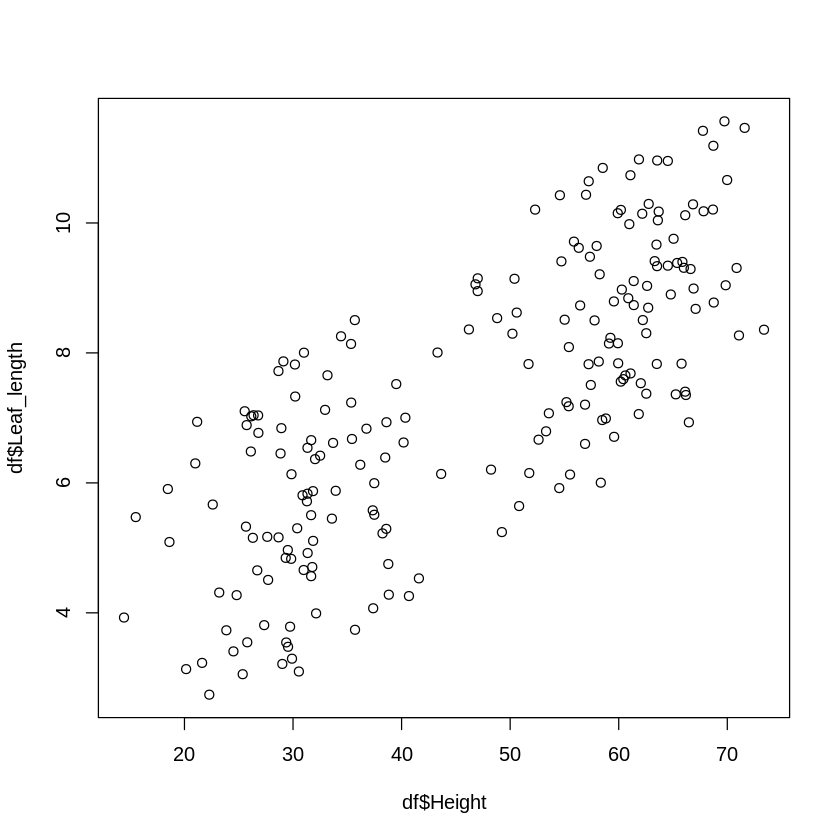

In [43]:
# データフレームdfのHeightとLeaf_lengthの散布図を描く
plot(df$Height, df$Leaf_length)

散布図では、各ドットが各個体の観察値を示しています。

散布図を描いてみると、草丈が高い個体は葉身長も長い傾向にあることが分かります。

(葉身長が長い個体は草丈が高い傾向にある、とも言えます。)

この様な、2変数の間に関係性があることを**相関**があると言います。

特に今回の様に変数$x$が大きいほど変数$y$が大きくなる傾向にある場合、**正の相関**があると言います。

逆に、変数$x$が大きいほど変数$y$が小さくなる傾向にある場合、**負の相関**があると言います。

また、変数$x$の大小と変数$y$の大小の間に関係がない場合、**無相関**と言います。

例えば草丈`Height`と年齢`Age`の散布図を描いてみると、これら2つの変数は無相関であることが分かります。

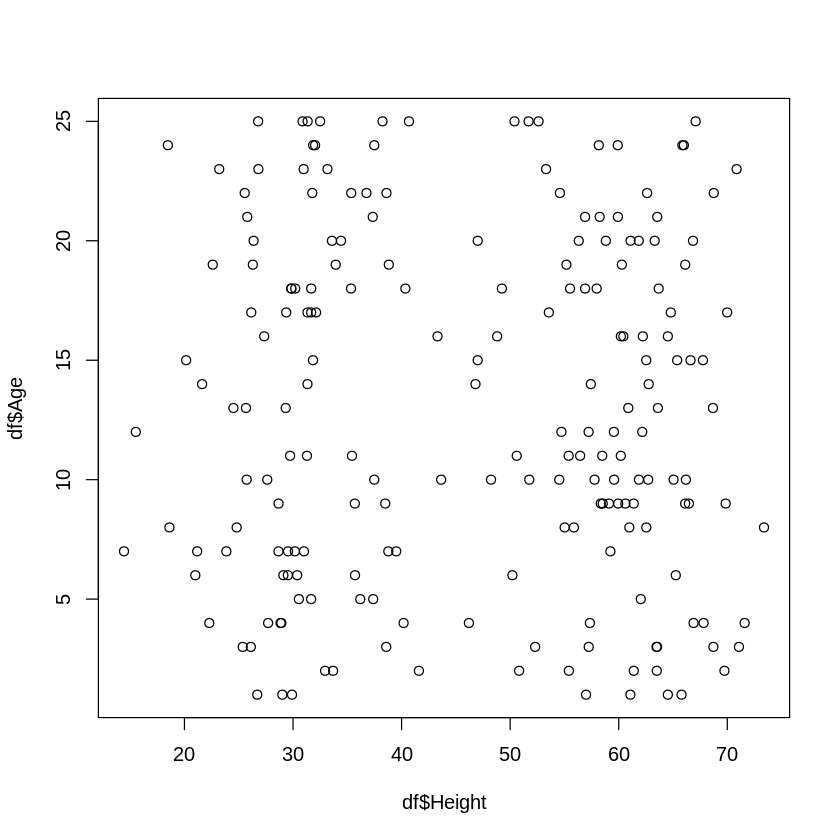

In [44]:
# データフレームdfのHeightとAgeの散布図を描く
plot(df$Height, df$Age)

また、草丈(Height)と葉身幅(Leaf_width)についても散布図を描いてみると、葉身長の時と同じ様に正の相関があることが分かります。

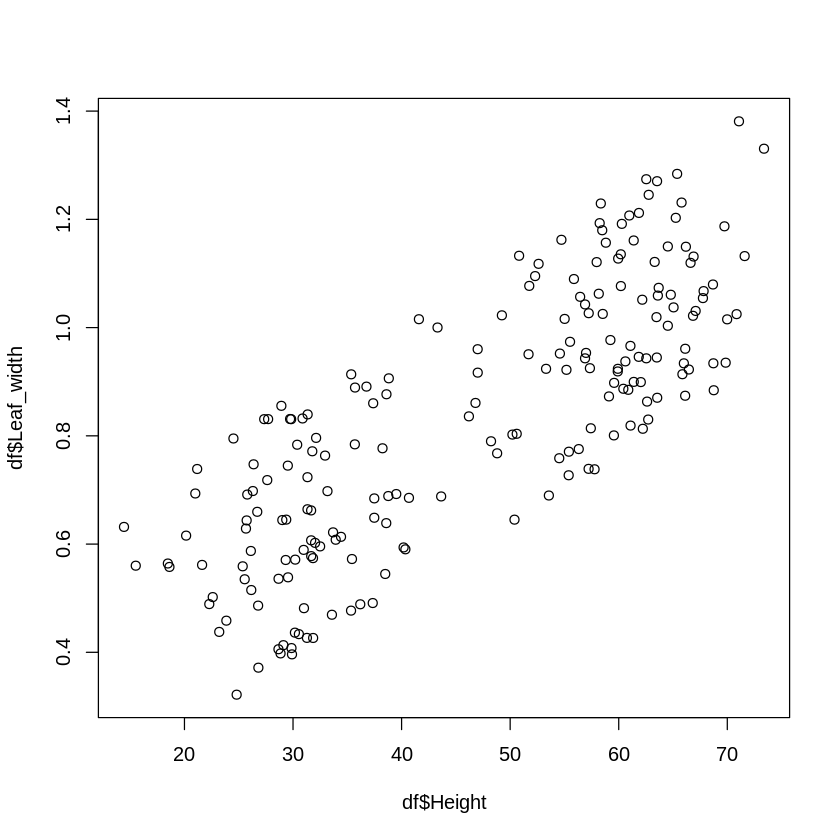

In [45]:
# データフレームdfのHeightとLeaf_widthの散布図を描く
plot(df$Height, df$Leaf_width)

### 相関係数

散布図を描くことで、相関がありそうかを視覚的に捉えることが出来ました。

次にこの相関の強さを数値として表しことにします。

相関の強さを表す指標として**相関係数**(correlation coefficient)があります。

相関係数には多くの定義がありますが、ここでは最も有名な**ピアソンの積率相関係数**を扱います。

相関係数と言うときには基本的にはこれを指すことが多いです。

2つの変数$x, y$のデータが$(x_1, y_1), (x_2, y_2), \cdots, (x_n, y_n)$で与えられたとき、変数$x$と変数$y$の間の相関係数$r_{xy}$は

$r_{xy}=\dfrac{\sum (x_i-\bar{x})(y_i-\bar{y})/n}{\sqrt{\sum (x_i-\bar{x})^2/n}\sqrt{\sum (y_i-\bar{y})^2/n}}=\dfrac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum (x_i-\bar{x})^2}\sqrt{\sum (y_i-\bar{y})^2}}$

で定義されます。

分母の、$\sqrt{\sum (x_i-\bar{x})^2/n}$, $\sqrt{\sum (y_i-\bar{y})^2/n}$は、$x, y$の標準偏差$s_x, s_y$を表しており、

分子の、$C_{xy}=\sum (x_i-\bar{x})(y_i-\bar{y})/n$は偏差の積の平均で、**共分散**と呼びます。

まずはこの共分散から見ていきましょう。

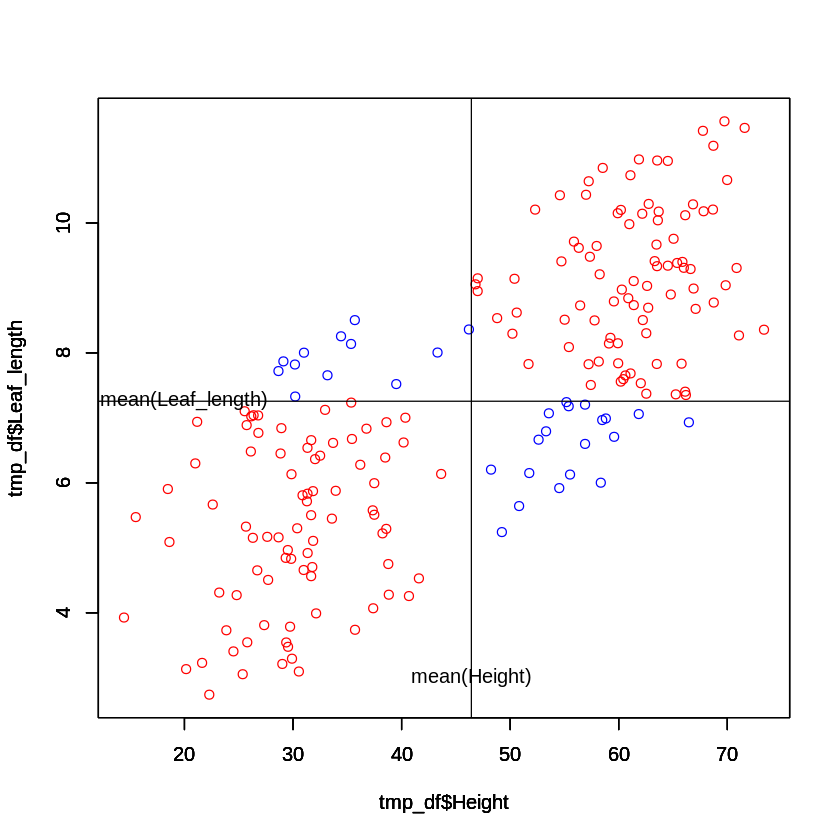

In [46]:
# 各変数の平均値より大きいか小さいかで色分けした散布図を描く
tmp_df <- df[(df$Height >= mean(df$Height)) & (df$Leaf_length >= mean(df$Leaf_length)),]
plot(tmp_df$Height, tmp_df$Leaf_length, xlim=range(df$Height), ylim=range(df$Leaf_length), col="red")
par(new=T)
tmp_df <- df[(df$Height < mean(df$Height)) & (df$Leaf_length >= mean(df$Leaf_length)),]
plot(tmp_df$Height, tmp_df$Leaf_length, xlim=range(df$Height), ylim=range(df$Leaf_length), col="blue")
par(new=T)
tmp_df <- df[(df$Height >= mean(df$Height)) & (df$Leaf_length < mean(df$Leaf_length)),]
plot(tmp_df$Height, tmp_df$Leaf_length, xlim=range(df$Height), ylim=range(df$Leaf_length), col="blue")
par(new=T)
tmp_df <- df[(df$Height < mean(df$Height)) & (df$Leaf_length < mean(df$Leaf_length)),]
plot(tmp_df$Height, tmp_df$Leaf_length, xlim=range(df$Height), ylim=range(df$Leaf_length), col="red")
abline(v=mean(df$Height))
abline(h=mean(df$Leaf_length))
text(mean(df$Height), 3, 'mean(Height)')
text(20, mean(df$Leaf_length), 'mean(Leaf_length)')

上のグラフは、草丈と葉身長の散布図を平均値より大きいか小さいかで色分けしたものになります。

赤色の部分では、偏差の積$(x_i-\bar{x})(y_i-\bar{y}) > 0$で正となり、

青色の部分では、偏差の積$(x_i-\bar{x})(y_i-\bar{y}) < 0$で負となります。

つまり、共分散は赤色にくる観測値が増えるほど+に寄り、青色に来る観測値が増えるほど-に寄ることになります。

どちらの領域にもまんべんなくデータが分布していれば、共分散は(結果的に相関係数も)0に近づきます。

Rでは`cov`関数で共分散が計算できるので、

* 草丈(Height)と葉身長(Leaf_length)
* 草丈(Height)と葉身幅(Leaf_width)
* 草丈(Height)と年齢(Age)

それぞれの共分散を求めてみましょう。

`cov(Height列のデータ, Leaf_length列のデータ)`

In [47]:
# 各データの組み合わせごとに共分散を求める
print("Height & Leaf length")
cov(df$Height, df$Leaf_length)
print("Height & Leaf width")
cov(df$Height, df$Leaf_width)
print("Height & Age")
cov(df$Height, df$Age)

[1] "Height & Leaf length"


[1] 25.91788

[1] "Height & Leaf width"


[1] 3.024232

[1] "Height & Age"


[1] -4.552701

`cov`関数を使用すると共分散が求まりますが、この共分散の値だけでは、相関の強さがどの程度か、ということはよくわかりません。

実際に草丈(Height)と葉身長(Leaf_length)、葉身幅(Leaf_width)のプロットを見てみると、むしろ共分散の小さい葉身幅の方が相関が強そうに見えます。

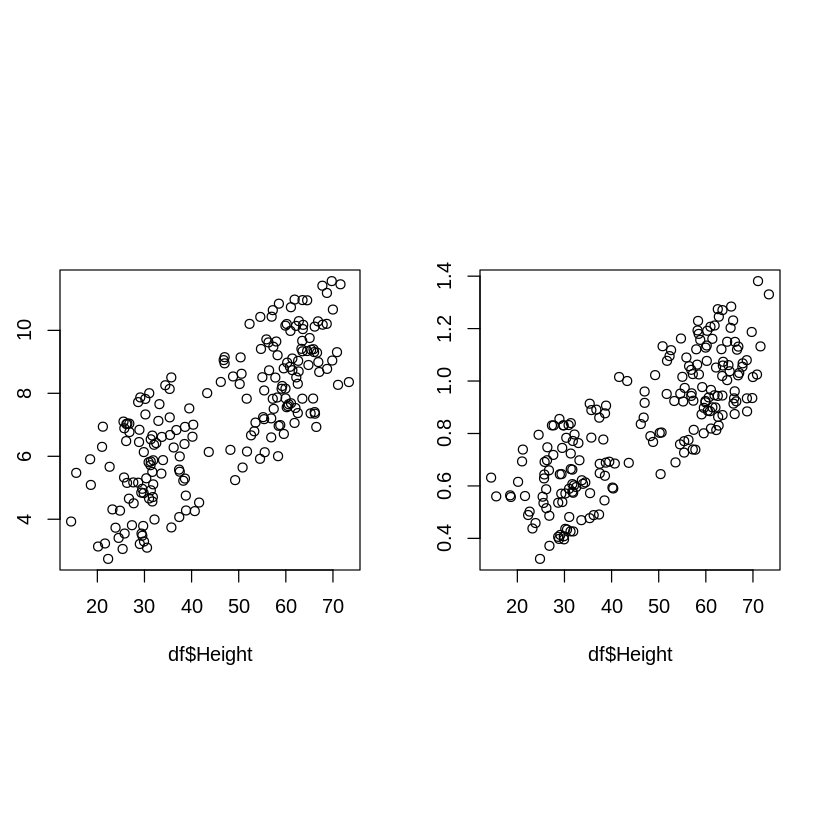

In [48]:
# Heightとleaf_length, HeightとLeaf_widthの散布図を並べて描く
par(pin = c(2.5,2.5))
par(mfrow=c(1, 2)) # 2つ並べて描く
plot(df$Height, df$Leaf_length)
plot(df$Height, df$Leaf_width)

分散と標準偏差の時と同じ様に、データの単位やスケール等によって共分散の値は大きく変わってしまうためです。

そこで、標準偏差を利用して、測定単位等の影響を受けない相関の指標にしたものが**相関係数**になります。

相関係数は先ほども示した通り、$r_{xy}=\dfrac{C_{xy}}{s_xs_y}$ で定義されます。

共分散$C_{xy}$を標準偏差$s_x, s_y$の積で割ることで、測定単位の影響が無くなります。

Rでは`cor`関数によって相関係数を計算できます。

* 草丈(Height)と葉身長(Leaf_length)
* 草丈(Height)と葉身幅(Leaf_width)
* 草丈(Height)と年齢(Age)

それぞれの相関係数を求めてみましょう。

`cor(Height列のデータ, Leaf_length列のデータ)`

In [49]:
# 各変数間の相関係数を求める
print("Height & Leaf length")
cor(df$Height, df$Leaf_length)
print("Height & Leaf width")
cor(df$Height, df$Leaf_width)
print("Height & Age")
cor(df$Height, df$Age)

[1] "Height & Leaf length"


[1] 0.7663091

[1] "Height & Leaf width"


[1] 0.7987358

[1] "Height & Age"


[1] -0.03918645

相関係数は$-1\leqq r_{xy}\leqq1$の値の範囲をとり、1に近いほど相関が強く、-1に近いほど負の相関が強いことになります。

そして0になると無相関です。

今回の結果からは、草丈と葉身長・葉身幅は同じ程度に相関が強く、草丈と年齢は無相関だということが分かります。

注意点として、よく統計の教科書では相関係数0.7以上だと"強い相関"等の基準が決められていたりします。

しかし、相関係数はデータサイズや分布等によって大きく変化するため、その様な基準は参考程度にしましょう。

また、線形的な関係性以外を捉えにくい指標でもあるので、散布図を確認するのが最重要です。

下のサンプルデータで相関係数の計算と散布図の描写を実施し、役に立たない時の例を見てみましょう。

[1] 0

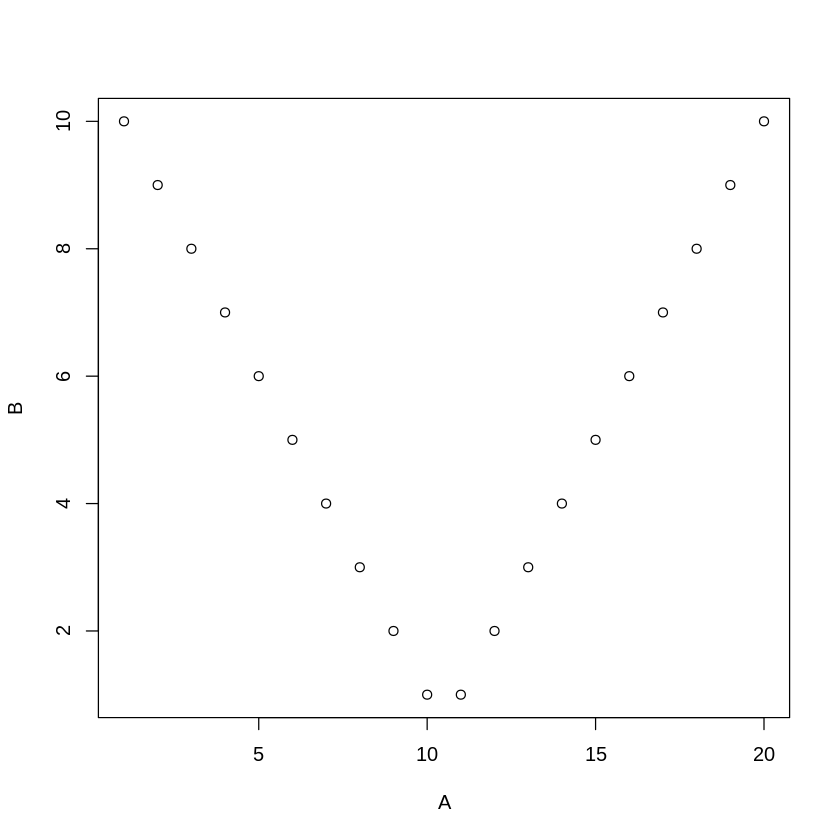

In [50]:
# 相関が役に立たない例1
A <- seq(1,20)
B <- c(10,9,8,7,6,5,4,3,2,1,1,2,3,4,5,6,7,8,9,10)
plot(A, B)
cor(A, B)

AとBの間には明らかな関係性がありそうですが、相関係数で見てしまうと0になってしまいます。

[1] 0.7902098

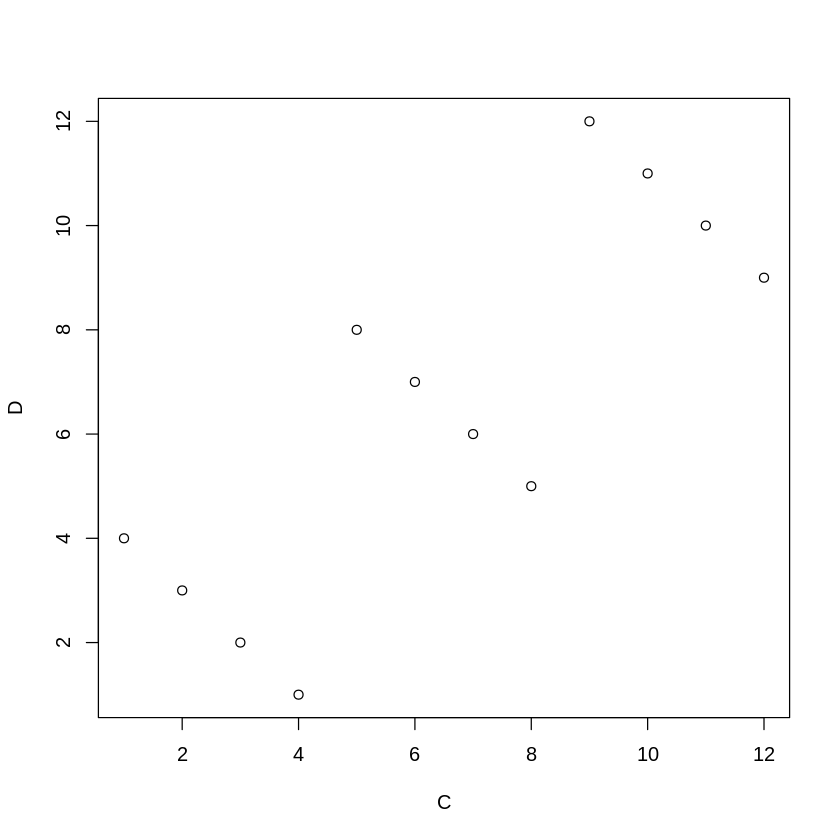

In [51]:
# 相関が役に立たない例2
C <- seq(1,12)
D <- c(4,3,2,1,8,7,6,5,12,11,10,9)
plot(C, D)
cor(C, D)

こちらは逆に、4つずつデータを見ると負の相関にあるのに、データ全体で見た結果、強い正の相関として判断されてしまう例です。

これらの例の様に、2変数の関係性は、相関係数という数字のみで判断するのではなく、散布図も必ず描いて確認する必要があります。

#### 因果関係

しばしば勘違いする人がいるのが、ある2つのデータの相関係数が高い(=強い相関関係がある)というのは、因果関係があるという訳では**無い**です。

* 強い相関であっても因果関係ではない例

例えば草丈と葉身長は基本的に高い相関にあると思われますが、どちらかが原因で、もう片方に影響を与えている訳ではなく、単にデカく育った植物が全部デカい・長い・重いだけの話になります。

* 因果関係にはあっても強い相関関係にはならない例

肥料を与えると基本的に植物は大きく育ちますが、与えすぎると栄養過多となり枯れてしまう場合があります。この場合、肥料の量と植物の大きさは因果関係にはありますが、相関係数という面では直線的な関係で無いため、それほど高くならないはずです。

#### 見かけ上の相関

また、よく判断を誤らせる相関関係として**見かけ上の相関**というものがあります。

例えば"大学受験の成績"と"ピアノを習っていた時間"に強い相関があり、「ピアノを習えば、成績が良くなる」と宣伝する人達がいたとします。

しかし、実際には"親の年収"が"大学受験の成績"につながっており、年収が高い親はピアノを習わせる余裕がある家が多かっただけ、の可能性もあります。

この時、"大学受験の成績"と"ピアノを習っていた時間"の間の見かけの相関にはあまり意味はありません。

※この様な場合、年収の影響を省いた上で、ピアノ時間と成績の相関係数を求める様な、**偏相関係数**という指標もあります。



### 回帰

散布図を描く際に、$x, y$の関係性を直線に当てはめて、回帰直線を描く場合があります。

これは、$y$が$x$によって左右もしくは決定されている様な関係性だった場合、**回帰**という方法で$x, y$の関係性を見ている形になります。

回帰分析についてはまた後半の講義で扱うので、その際に詳しく説明したいと思います。



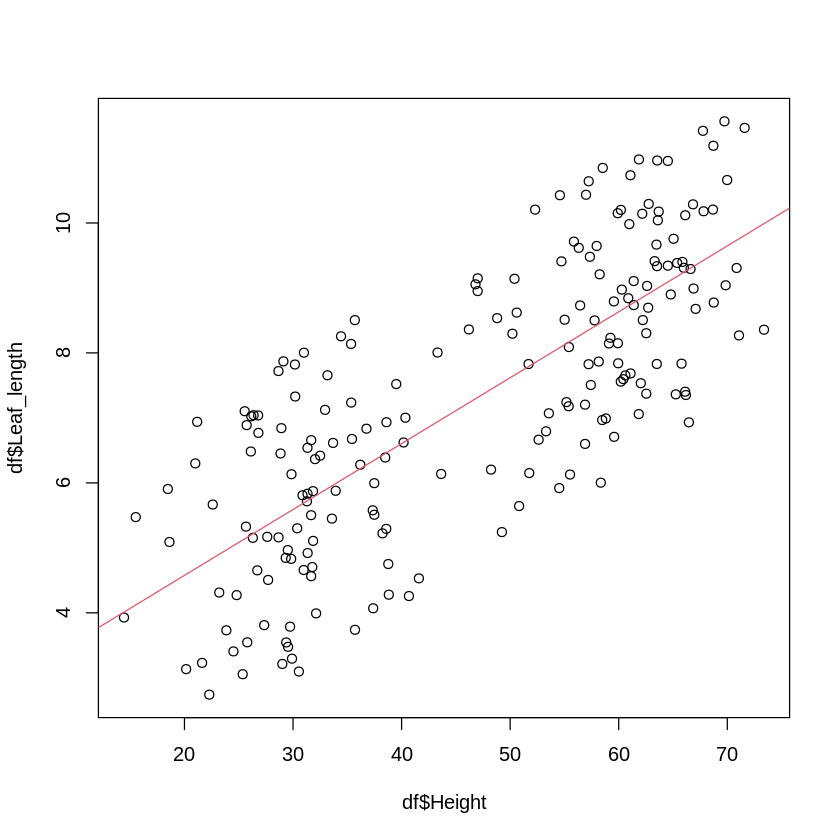

In [52]:
# 散布図に回帰直線を描く例
plot(df$Height,df$Leaf_length)
lm.obj<-lm(df$Leaf_length~df$Height)
abline(lm.obj,col=2)

### 分割表

ここまでの説明は2つの変数が量的なデータの時に、データを説明する方法でした。

では次に、2つの変数に質的なデータが含まれている場合を見ていきます。

質的なデータの場合は散布図等のグラフは作成しづらいので、**分割表**(クロス集計表とも呼ぶ)という表を作成します。

Rでは`table`関数でクロス集計表を作成可能です。

例えば、花の色(Flower)と抵抗性(Resistance)から表を作成すると

`table(Flowerの列データ, Resistanceの列データ)`

In [53]:
# Flower列とResistance列の分割表
table(df$Flower, df$Resistance)

        
         Normal Very strong Weak
  Blue       11          27    0
  Purple     13           0   42
  Red        59           0    0
  Yellow     48           0    0

こうして見ると、抵抗性の強い個体は全て青い花をしていて、弱い個体は全て紫色の花だとわかります。

また、2つの変数のうち片方が量的データ、もう片方が質的データの場合には、量的データの方を適当な階級に分けて項目化することで、分割表を作成出来ます。

デフォルトのRにはちょうど良い関数が無いので少しコードを書くことになりますが、

例えば、花の色(Flower)と草丈(Height)から表を作成すると

In [54]:
# Flowerと階級分けした草丈`Height`の分割表
breaks <- c(0, 10, 20, 30, 40, 50, 60, 70, 80)  # 例：0-29, 30-39, 40-49, 50以上
labels <- c("0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+")
df$Height_group <- cut(df$Height, breaks = breaks, labels = labels, right = FALSE)
table(df$Flower, df$Height_group)

        
         0-9 10-19 20-29 30-39 40-49 50-59 60-69 70+
  Blue     0     2    13    19     4     0     0   0
  Purple   0     2    26    25     2     0     0   0
  Red      0     0     0     0     3    31    25   0
  Yellow   0     0     0     0     4    12    28   4

この様に見ると、花の色と草丈に強い相関があることが分かります。

2つの変数の中に質的なデータが含まれていても、分割表を作成することで変数の間に相関があるかどうか確認できました。

この相関の強さを数値的に表す方法としては、**ファイ係数**と呼ばれるものがあります。

ファイ係数は分割表における行の変数と列の変数の関連の強さを示す指標にはなりますが、使える状況が限られていたり、あまり用いられる指標ではありません。

相関係数と散布図の時と同じ様に、質的データに関しても、ファイ係数の様な数値の大小ではなく、分割表を見てデータを捉える方が良いでしょう。



